<a href="https://colab.research.google.com/github/Akash743/Mathematical-Optimization/blob/main/Testing_final_brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline



In [2]:
df = pd.read_excel('Testing_data.xlsx',sheet_name="Brand")

##changing TV to Platform1, Platform2...these are livestream platforms


df.tail()

,Week,DAU,BRAND_lag1,DIGIAD2_imp,OM_E1_platformsb1_imp,TV_grp,TVFREE_grp,PERMKT_E2_type3_net,TVSPN_grp
100,WEEK 48 2021,796541.59872,76.633333,565063287,121261695,2313.4620,2055.9018,97886.160,1055.8912
101,WEEK 49 2021,701933.20960,82.650000,540792652,120915530,2292.4704,12364.9908,161251.965,866.8100
102,WEEK 50 2021,744659.57888,72.833333,224757281,37260291,1023.9372,5458.7646,138650.670,841.9964
103,WEEK 51 2021,762970.88000,77.266667,344322528,0,950.2626,0.0000,84827.565,747.9458
104,WEEK 52 2021,732452.04480,79.166667,363673688,3583430,810.9000,0.0000,62128.980,423.4090


In [3]:
df.columns=['Week', 'DAU', 'BRAND_lag1', 'DIGIAD2_imp', 'DIGIAD3_imp',
       'TVnews_grp', 'TVsports_grp', 'DIGIAD1_imp', 'TVent_grp']

In [4]:
df = df[['Week', 'DAU', 'BRAND_lag1','DIGIAD1_imp', 'DIGIAD2_imp', 'DIGIAD3_imp',
       'TVnews_grp', 'TVsports_grp','TVent_grp']]

In [8]:
df.head()

,Week,DAU,BRAND_lag1,DIGIAD1_imp,DIGIAD2_imp,DIGIAD3_imp,TVnews_grp,TVsports_grp,TVent_grp
0,WEEK 01 2020,288308.244357,29.915169,103032.180,0,0,0.0,0.0000,0.0
1,WEEK 02 2020,412552.227877,29.915169,159108.480,0,1220638,0.0,0.0000,0.0
2,WEEK 03 2020,425614.724167,42.806856,175051.620,0,508806,0.0,20.6958,0.0
3,WEEK 04 2020,399494.821389,44.162235,151972.155,0,1490363,0.0,0.0000,0.0
4,WEEK 05 2020,410566.074337,41.452006,169065.180,0,3742956,0.0,12.3114,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Week          105 non-null    object 
 1   DAU           105 non-null    float64
 2   BRAND_lag1    105 non-null    float64
 3   DIGIAD1_imp   105 non-null    float64
 4   DIGIAD2_imp   105 non-null    int64  
 5   DIGIAD3_imp   105 non-null    int64  
 6   TVnews_grp    105 non-null    float64
 7   TVsports_grp  105 non-null    float64
 8   TVent_grp     105 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.5+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
DAU,105.0,6.594528e+05,9.869570e+04,288308.244357,6.303891e+05,6.798750e+05,7.185447e+05,7.965416e+05
BRAND_lag1,105.0,6.798661e+01,1.088059e+01,29.915169,6.522388e+01,7.048387e+01,7.441667e+01,8.265000e+01
DIGIAD1_imp,105.0,1.505148e+05,5.484622e+04,62128.980000,1.023905e+05,1.493091e+05,1.830511e+05,3.413627e+05
DIGIAD2_imp,105.0,1.767330e+08,1.582817e+08,0.000000,0.000000e+00,1.567240e+08,3.055714e+08,5.650633e+08
DIGIAD3_imp,105.0,6.342212e+07,5.126378e+07,0.000000,2.565178e+07,5.329128e+07,8.657592e+07,2.565146e+08
TVnews_grp,105.0,8.682180e+02,7.691088e+02,0.000000,3.630282e+02,7.120722e+02,1.203957e+03,3.698489e+03
TVsports_grp,105.0,3.618637e+02,1.348111e+03,0.000000,0.000000e+00,1.657500e+01,2.034594e+02,1.236499e+04
TVent_grp,105.0,2.996780e+02,4.504669e+02,0.000000,0.000000e+00,0.000000e+00,5.411364e+02,1.594764e+03


**Grouping for IVs(except Brand Score, covid, DAU) is done along their weekly sum **

<Figure size 1584x360 with 0 Axes>

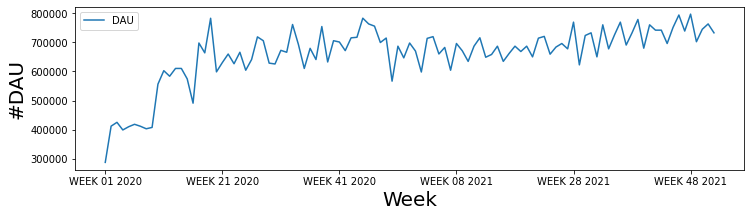

In [ ]:
f= plt.figure(figsize=(22,5))
p = df[['DAU','Week']].set_index('Week').plot(legend=True);#
p.set_xlabel("Week", fontsize = 20)
p.set_ylabel("#DAU", fontsize = 20)
plt.gcf().set_size_inches(12, 3)

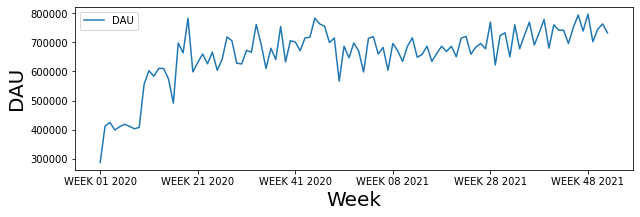

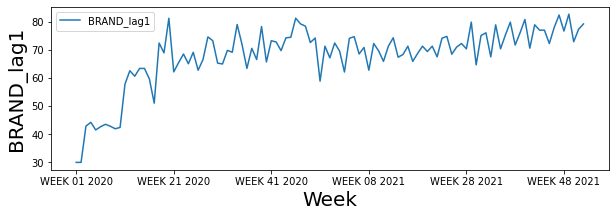

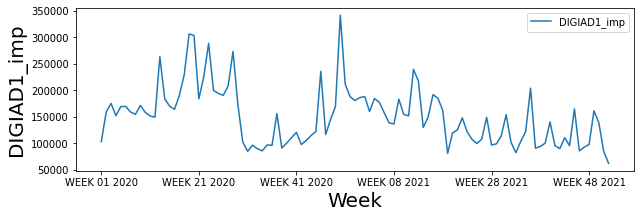

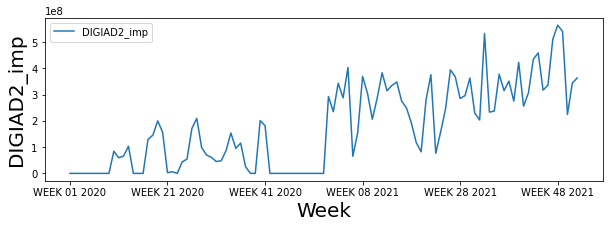

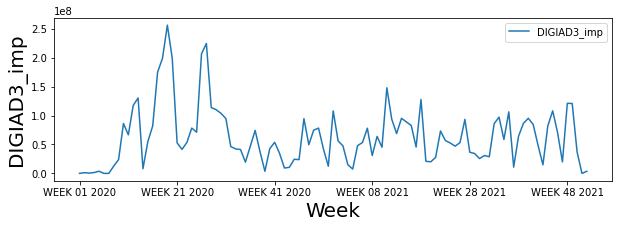

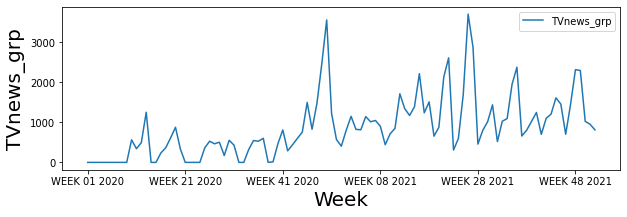

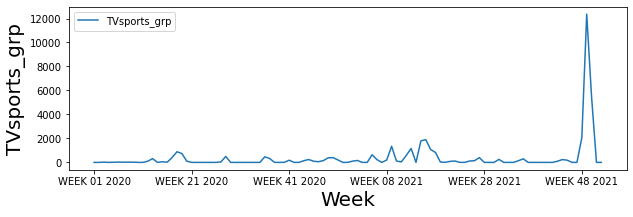

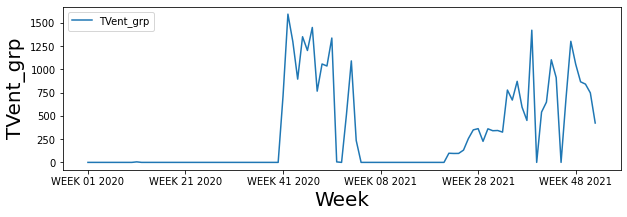

In [ ]:
#Line PLots
for i in df.columns[1:]:
  #f= plt.figure(figsize=(18,3))
  #fig, axes = plt.subplots(1,2)
  p = df[[i,"Week"]].set_index('Week').plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel(i, fontsize = 20)
  plt.gcf().set_size_inches(10, 3)

In [ ]:
useful = df.columns[1:]
dfu=df[useful]

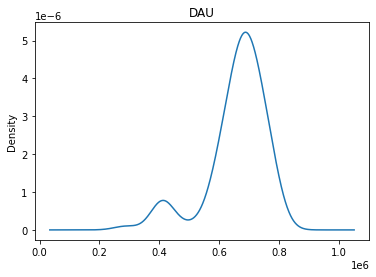

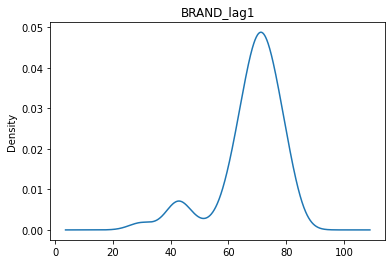

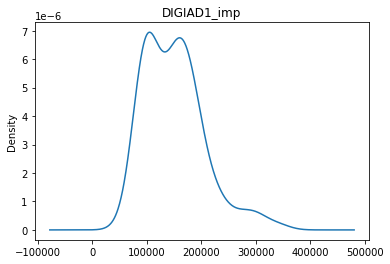

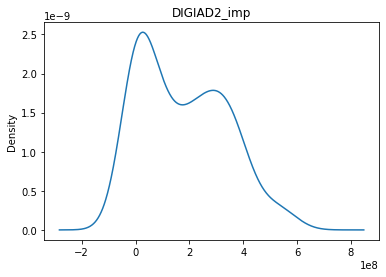

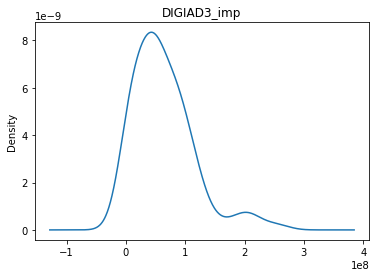

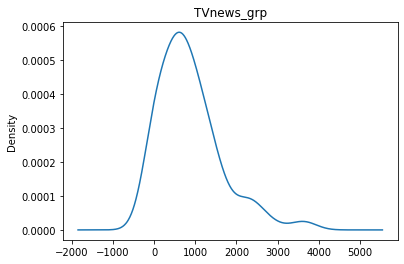

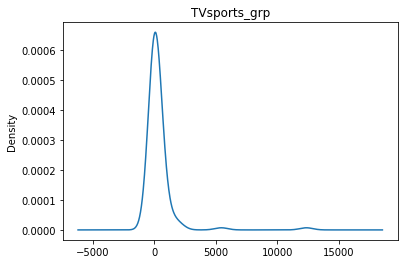

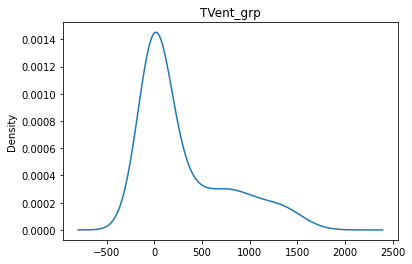

In [ ]:
for i in range(0,len(df.columns[1:])):
  dfu[dfu.columns[i]].plot.density()
  plt.title(dfu.columns[i])
  plt.show()
#df.Covid_index.plot.density()


Bivariate Analysis

In [ ]:
for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)

In [ ]:
df.head(2)



,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,EndPeriod,DAU,Covid_index,...,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,2020-01-01,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,712379.73444,0.0,...,0,0,0,0,5788,0,22537,0,40497,0
1,2020-01-02,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,715694.90952,0.0,...,0,0,0,0,4492,0,18279,0,41306,0


In [ ]:
df['EndPeriod'] = pd.to_datetime(df['EndPeriod'])

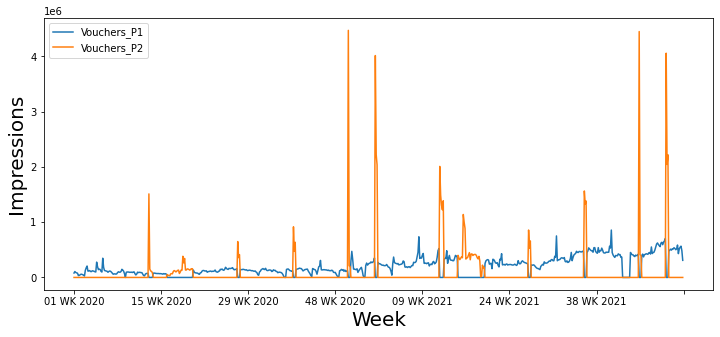

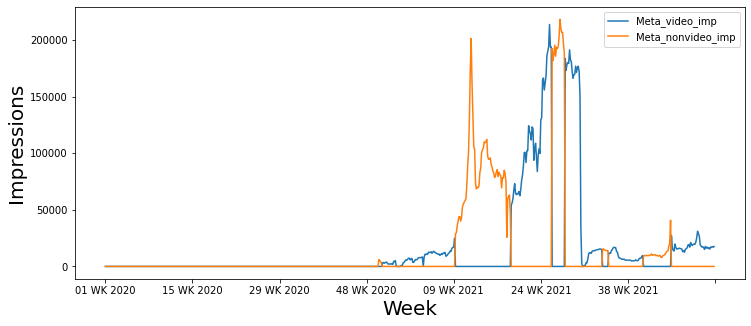

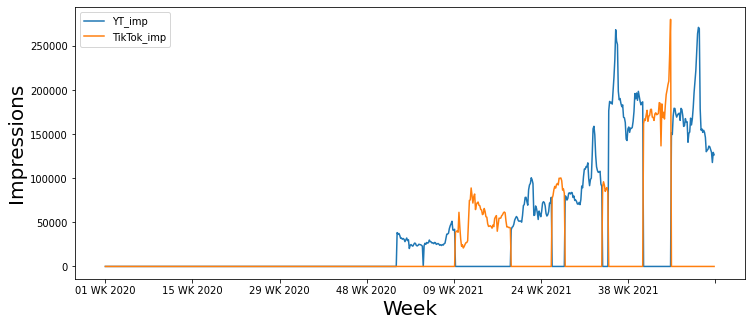

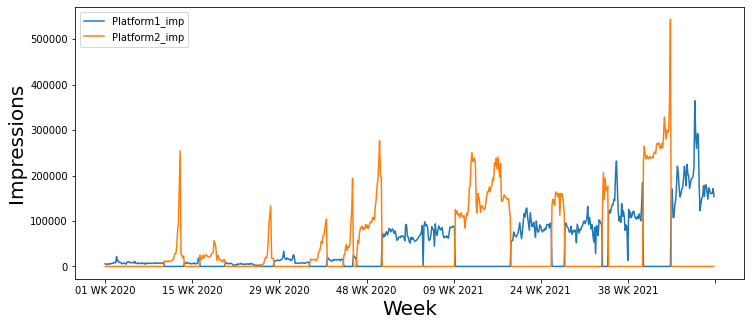

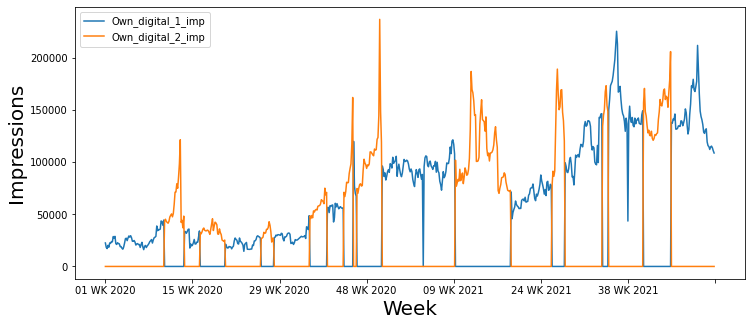

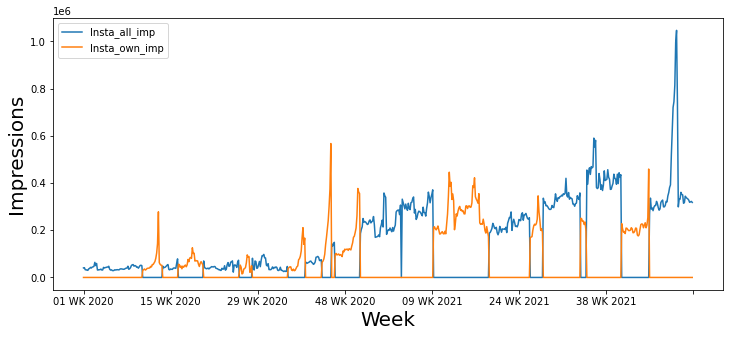

In [ ]:
for i in range(3,len(dfu.columns)-1,2):
#  f= plt.figure(figsize=(18,3))
#   p = dff[i].plot(legend=True);
#   p.set_xlabel("Week", fontsize = 20)
#   p.set_ylabel(i, fontsize = 20)
  

  #f = plt.figure(figsize=(20,10))
  p = df[[useful[i],useful[i+1],'Week2']].set_index('Week2').plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel("Impressions", fontsize = 20);
  plt.gcf().set_size_inches(12, 5)  



In [ ]:
km = ['Vouchers_P1',
 'Vouchers_P2',
 'Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'Platform1_imp',
 'Platform2_imp',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp']

In [ ]:
df.drop(['Execution'],axis=1,inplace=True)

In [ ]:
## Finding #executions
exec_df = pd.DataFrame()
for i in km:
  exec_df[i] = np.where(df[i]!=0,1,0)
a=pd.concat([exec_df,df[['Year']]],axis=1)  

In [ ]:
exec_df.head(2)

,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,1,0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
a.head()

,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp,Year
0,1,0,0,0,0,0,1,0,1,0,1,0,2020
1,1,0,0,0,0,0,1,0,1,0,1,0,2020
2,1,0,0,0,0,0,1,0,1,0,1,0,2020
3,1,0,0,0,0,0,1,0,1,0,1,0,2020
4,1,0,0,0,0,0,1,0,1,0,1,0,2020


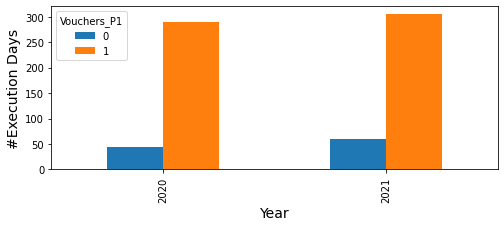

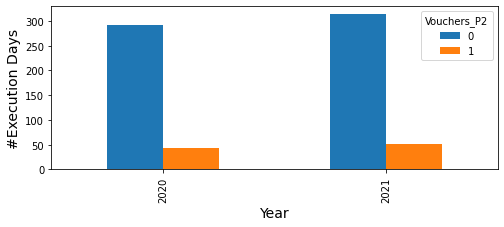

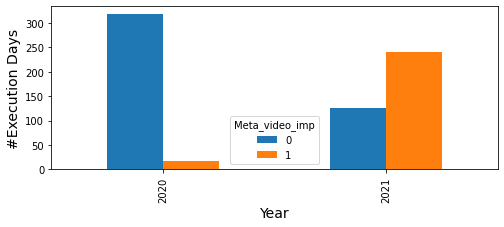

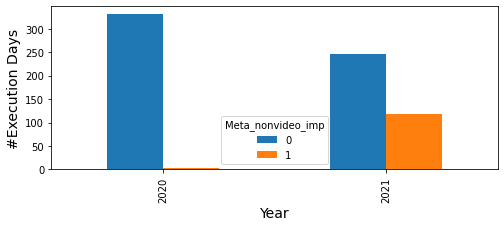

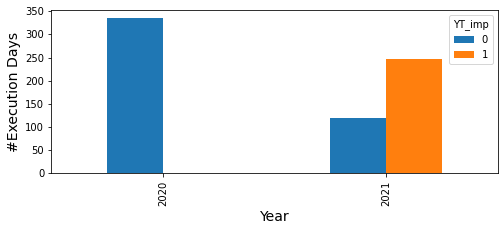

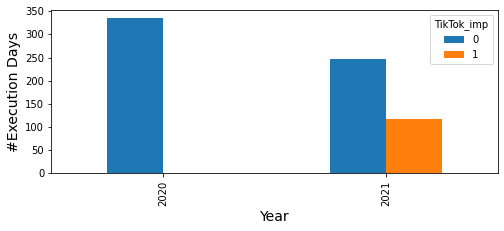

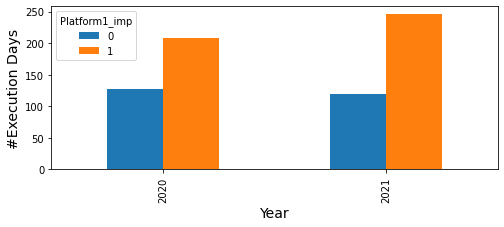

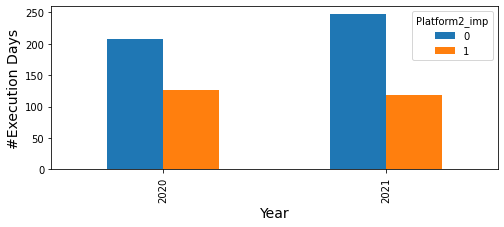

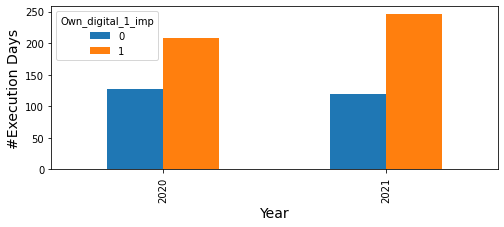

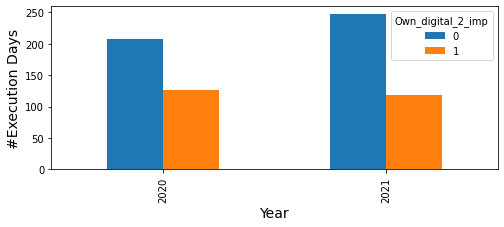

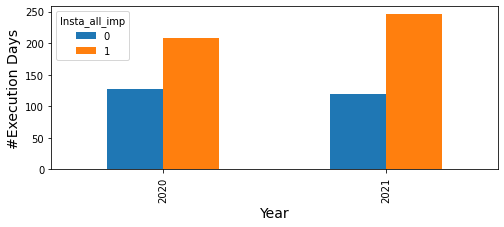

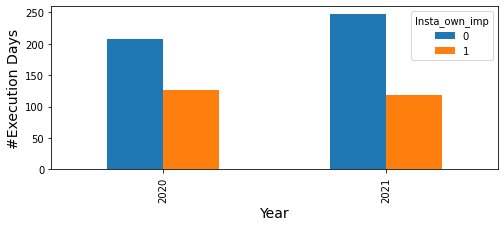

In [ ]:

for i in range(0,len(exec_df.columns)):
  
  #fig, axes = plt.subplots(1,4)#figsize=(10, 3))
  a.groupby(['Year'])[a.columns[i]].value_counts().unstack().plot(kind='bar',stacked = False)
  #a.groupby(['Year'])[a.columns[i+1]].value_counts().unstack().plot(kind='bar',stacked = False)
  plt.xlabel("Year", size=14)
  plt.ylabel("#Execution Days", size=14)
  
  # axes[0].set_title(a.columns[i])
  # axes[1].set_title(a.columns[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(8, 3)
  #plt.annotate(xytext=(0, 5))

  #### Can add a table also showing %execution by year

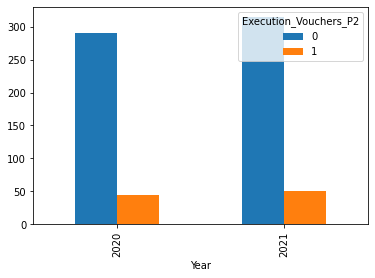

In [ ]:
ax1 = a.groupby(['Year'])['Execution_Vouchers_P2'].value_counts().unstack().plot(kind='bar',stacked = False)
plt.xlabel("Students", size=15)
 
# Setting the y-axis label and its size


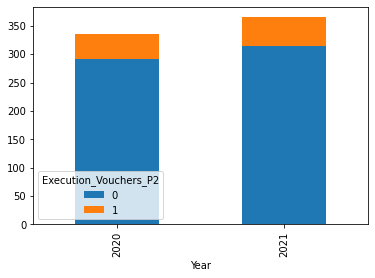

In [ ]:
ax1 = a.groupby(['Year'])['Execution_Vouchers_P2'].value_counts().unstack().plot(kind='bar',stacked = True,align)


In [9]:
df.columns

Index(['Week', 'DAU', 'BRAND_lag1', 'DIGIAD1_imp', 'DIGIAD2_imp',
       'DIGIAD3_imp', 'TVnews_grp', 'TVsports_grp', 'TVent_grp'],
      dtype='object')

In [5]:
df['Year'] = df['Week'].apply(lambda x : x[-4:])

In [11]:
df.head()

,Week,DAU,BRAND_lag1,DIGIAD1_imp,DIGIAD2_imp,DIGIAD3_imp,TVnews_grp,TVsports_grp,TVent_grp,Year
0,WEEK 01 2020,288308.244357,29.915169,103032.180,0,0,0.0,0.0000,0.0,2020
1,WEEK 02 2020,412552.227877,29.915169,159108.480,0,1220638,0.0,0.0000,0.0,2020
2,WEEK 03 2020,425614.724167,42.806856,175051.620,0,508806,0.0,20.6958,0.0,2020
3,WEEK 04 2020,399494.821389,44.162235,151972.155,0,1490363,0.0,0.0000,0.0,2020
4,WEEK 05 2020,410566.074337,41.452006,169065.180,0,3742956,0.0,12.3114,0.0,2020


In [12]:
## Done on daily level data
df[[ 'DAU', 'BRAND_lag1', 'DIGIAD1_imp', 'DIGIAD2_imp',
       'DIGIAD3_imp', 'TVnews_grp', 'TVsports_grp', 'TVent_grp',
 'Year']].groupby('Year').mean().T

Year,2020,2021
DAU,6.186553e+05,7.010348e+05
BRAND_lag1,6.339109e+01,7.267052e+01
DIGIAD1_imp,1.674134e+05,1.332912e+05
DIGIAD2_imp,4.938797e+07,3.065271e+08
DIGIAD3_imp,6.685424e+07,5.992400e+07
TVnews_grp,4.803334e+02,1.263562e+03
TVsports_grp,1.110932e+02,6.174568e+02
TVent_grp,2.400712e+02,3.604312e+02


In [ ]:
df['Year'].unique()

array([2020, 2021])

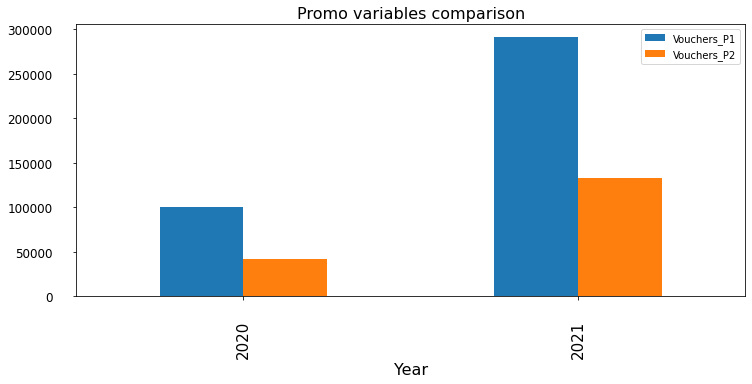

In [ ]:
##Promo- Average over years
## Promo vars
df[['Vouchers_P1',
 'Vouchers_P2','Year']].groupby('Year').mean().plot(kind='bar')
plt.gcf().set_size_inches(12, 5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.xlabel('Year',size=16)
plt.title('Promo variables comparison',size=16)
plt.tick_params(axis='both', which='major', pad=20)

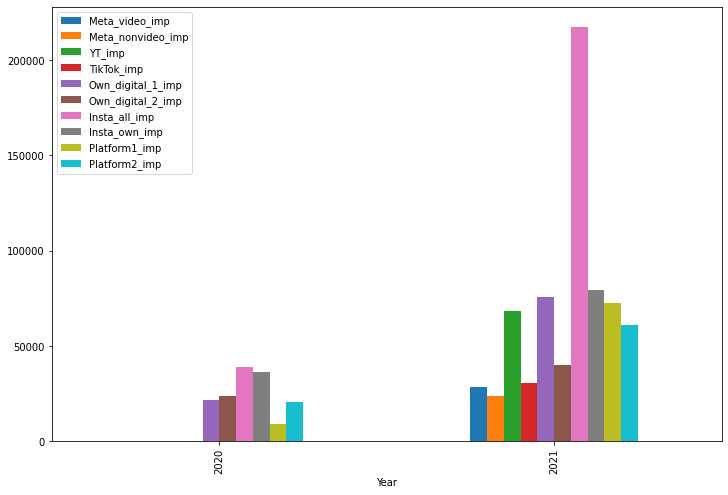

In [ ]:
S##Digital media
df[['Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp','Year','Platform1_imp','Platform2_imp'
 ]].groupby('Year').mean().plot(kind='bar')
plt.gcf().set_size_inches(12, 8)

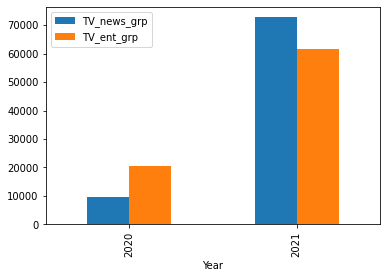

In [ ]:
###Traditional media
df[[ 'Platform1',
 'Platform2','Year']].groupby(by='Year').mean().plot(kind='bar')

In [ ]:

for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)

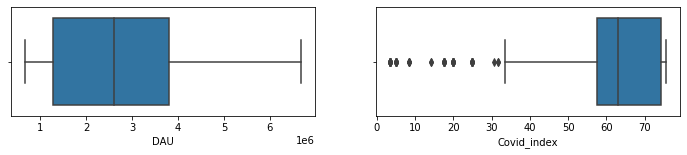

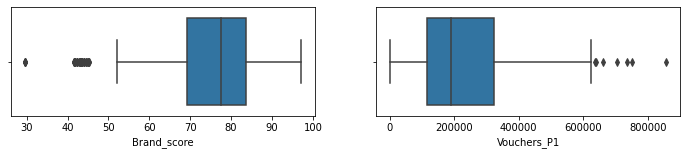

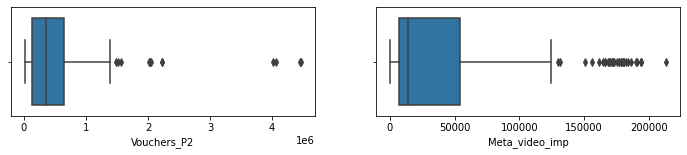

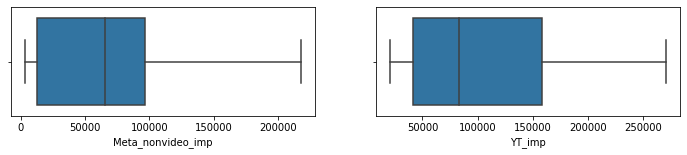

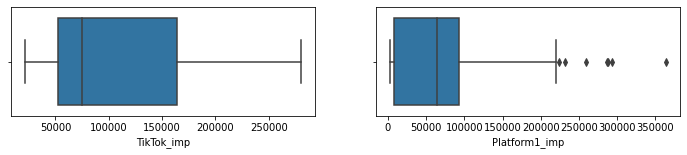

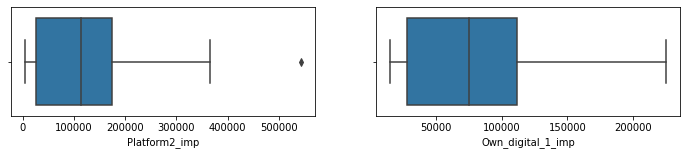

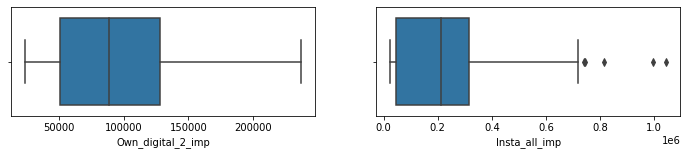

In [ ]:
###Outliers removal

##  Bar plots
import seaborn as sns
for i in range(0,len(useful)-1,2):
    # ignoring zero values for plotting
    fig, axes = plt.subplots(1,2)
    sns.boxplot(x=df[df[useful[i]]!=0][useful[i]],ax=axes[0])
    sns.boxplot(x=df[df[useful[i+1]]!=0][useful[i+1]],ax=axes[1])
    plt.gcf().set_size_inches(12,2)
    #plt.show()

## Some high values can be observed in ... but it is in consonance with the spends data. Hence, can't be labelled as outliers. 

## **FEATURE ENGINEERING**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

dt = pd.read_excel('Testing_data.xlsx',sheet_name='Mod2')
dm = pd.read_excel('Testing_data.xlsx',sheet_name='Spends')
#dt.drop('EndPeriod.1',axis=1,inplace=True)


In [19]:
dm.head()

,Year,DIGIAD1,DIGIAD2,DIGIAD3,TVnews,TVsports,TVent
0,2020,8495990,671617.78,799223.47,6.520684e+06,2.536121e+06,1.755627e+06
1,2021,6747315,12853248.03,1524408.75,1.967753e+07,6.146141e+06,2.807815e+06


Text(0, 0.5, 'Spends')

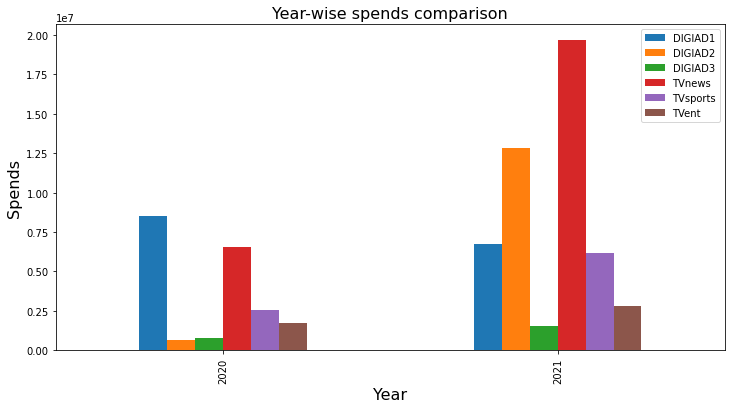

In [25]:
dm.groupby(by='Year').sum().plot(kind='bar')
plt.gcf().set_size_inches(12,6)
plt.title('Year-wise spends comparison',size=16)
plt.xlabel('Year',size=16)
plt.ylabel('Spends',size=16)

Text(0, 0.5, 'Spends')

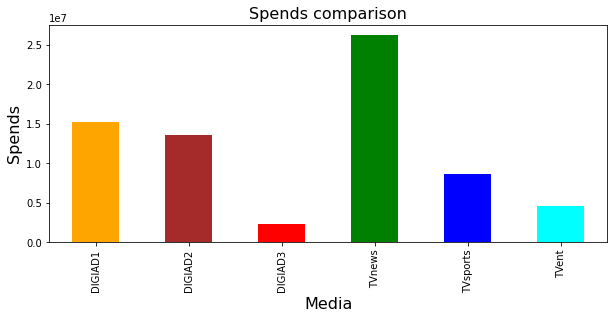

In [33]:
dm.iloc[:,1:].sum().plot(kind='bar',color=['orange','brown', 'red', 'green', 'blue', 'cyan'])
plt.gcf().set_size_inches(10,4)
plt.title('Spends comparison',size=16)
plt.xlabel('Media',size=16)
plt.ylabel('Spends',size=16)

In [34]:
dt.columns

Index(['Week', 'DAU', 'BRAND_lag1', 'DIGIAD2', 'DIGIAD3', 'Tvnews', 'Tvsports',
       'DIGIAD1', 'Tvent'],
      dtype='object')

In [10]:
dt = dt[['Week', 'DAU', 'BRAND_lag1','DIGIAD1','DIGIAD2', 'DIGIAD3','Tvnews', 'Tvsports','Tvent']]

In [8]:
dm.columns

Index(['Year', 'DIGIAD1', 'DIGIAD2', 'DIGIAD3', 'TVnews', 'TVsports', 'TVent'], dtype='object')

In [11]:
dm=pd.concat([dt[['Week']],dm],axis=1)

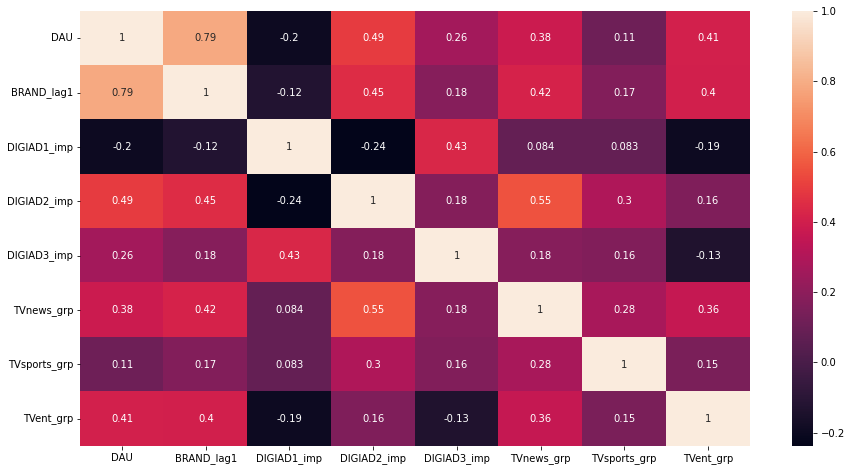

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr().iloc[0,1:]

BRAND_lag1      0.788172
DIGIAD1_imp    -0.197426
DIGIAD2_imp     0.492334
DIGIAD3_imp     0.261470
TVnews_grp      0.381532
TVsports_grp    0.114348
TVent_grp       0.407396
Name: DAU, dtype: float64

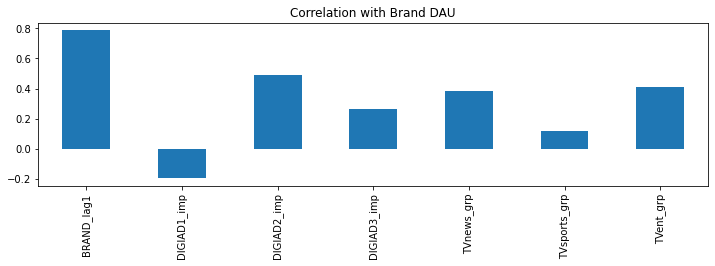

In [19]:
df.corr().iloc[0,1:].plot(kind='bar')
plt.title('Correlation with Brand DAU',size=12)
plt.gcf().set_size_inches(12,3)

### **Spends**

In [ ]:
dm = pd.read_excel('Testing_data.xlsx',sheet_name="Spends")
# dm = pd.read_excel('testing.xlsx',sheet_name="Spends_manip")
# ds = pd.read_excel('testing.xlsx',sheet_name="Spends")
# dm.drop('EndPeriod.1',axis=1,inplace=True)
# ds.drop('EndPeriod.1',axis=1,inplace=True)
#ds.head()

In [ ]:
## Contribution 
x2=['const', 'Covid_index', 'Brand_score', 'AHS', 'ALS','Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own']
y2 = [6.18,19.92,19.72,-1.07,4.48,13.29,1.43,3.97,2.21,2.3,2.25,1.24,17.41,4.44,2.18]
def addlabels2(x2,y2):
    for i in range(len(x2)):
      #if x2[i] in ['const', 'Covid_index', 'Brand_score','AHS','LHS']:
        plt.text(i, y2[i], y2[i], ha = 'center',size=17)
      # else:
      #   plt.text(i, y2[i], y2[i], ha = 'center',size=14,color='blue')


      
plt.figure(figsize = (24, 5))
plt.bar(x2[0:5],y2[0:5],color='red')
plt.bar(x2[5:],y2[5:],color='blue')

addlabels2(x2,y2)  
#addlabels2(x2[5:],y2[5:])  
      
# giving title to the plot
plt.title("Contribution(Base & Incremental)",size=15)
  
# giving X and Y labels
plt.xlabel("Variable",size=15,labelpad=10)
plt.ylabel("Contribution %",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.tick_params(axis='both', which='major', pad=20)
  
# visualizing the plot
plt.show()

In [ ]:
dm['Own_digital_2'].sum()

21748827

In [ ]:
dm.columns

Index(['Date', 'Vouchers_P1', 'Vouchers_P2', 'Meta_video', 'Meta_nonvideo',
       'YT', 'TikTok', 'Own_digital_1', 'Own_digital_2', 'Insta_all',
       'Insta_own', 'Platform1', 'Platform2', 'Year'],
      dtype='object')

In [ ]:
## Spends coverage



np.sum(dm[['Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_own','Platform2'
 ]].sum())/sum(dm[['Vouchers_P1', 'Vouchers_P2', 'Meta_video', 'Meta_nonvideo',
       'YT', 'TikTok', 'Own_digital_1', 'Own_digital_2', 'Insta_all',
       'Insta_own', 'Platform1', 'Platform2']].sum())

0.8600506864100829

In [36]:
dm[dm.columns[1:]].sum(axis=0)

DIGIAD1     1.524330e+07
DIGIAD2     1.352487e+07
DIGIAD3     2.323632e+06
TVnews      2.619822e+07
TVsports    8.682262e+06
TVent       4.563442e+06
dtype: float64

In [37]:
df.columns

Index(['Week', 'DAU', 'BRAND_lag1', 'DIGIAD1_imp', 'DIGIAD2_imp',
       'DIGIAD3_imp', 'TVnews_grp', 'TVsports_grp', 'TVent_grp', 'Year'],
      dtype='object')

In [35]:
dm.columns

Index(['Year', 'DIGIAD1', 'DIGIAD2', 'DIGIAD3', 'TVnews', 'TVsports', 'TVent'], dtype='object')

In [40]:
cpp_ratio_man2 = dm[dm.columns[1:]].sum(axis=0).values/df[df.columns[3:-1]].sum(axis=0).values

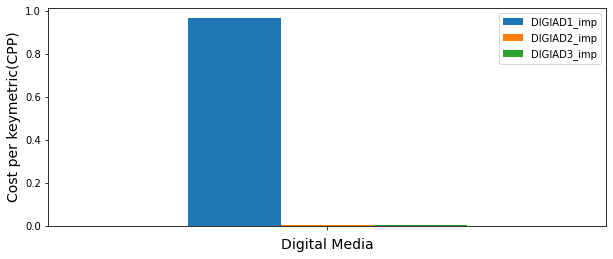

In [44]:
## CPP  for digital media 

cpp_ratio_man2 = dm[dm.columns[1:4]].sum(axis=0).values/df[df.columns[3:6]].sum(axis=0).values
cpp_man2 = pd.DataFrame([cpp_ratio_man2],columns = df.columns[3:6])
cpp_man2.plot(kind='bar')
plt.xlabel("Digital Media", size=14)
plt.ylabel("Cost per keymetric(CPP)", size=14)
plt.xticks(size=2)
plt.gcf().set_size_inches(10, 4)


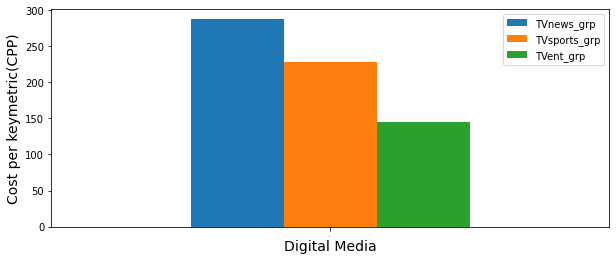

In [54]:
## CPP  for digital media 

cpp_ratio_man3 = dm[dm.columns[4:7]].sum(axis=0).values/df[df.columns[6:-1]].sum(axis=0).values
cpp_man3 = pd.DataFrame([cpp_ratio_man3],columns = df.columns[6:-1])
cpp_man3.plot(kind='bar')
plt.xlabel("Digital Media", size=14)
plt.ylabel("Cost per keymetric(CPP)", size=14)
plt.xticks(size=2)
plt.gcf().set_size_inches(10, 4)


In [55]:
cpp_ratio_man3

array([287.37807543, 228.50647069, 145.02682594])

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

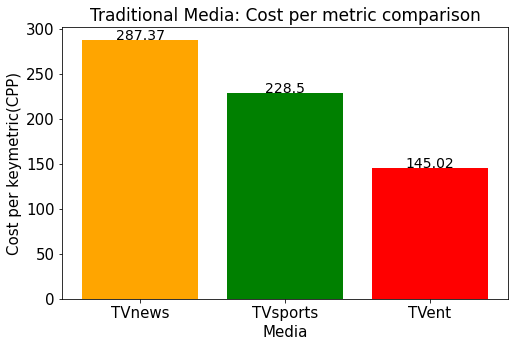

In [59]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=14)

x=['TVnews','TVsports','TVent']
y= [287.37,228.50,145.02]
plt.figure(figsize = (8, 5))
plt.bar(x,y,color=['orange', 'green', 'red'])
addlabels(x, y)
      
# giving title to the plot
plt.title("Traditional Media: Cost per metric comparison",size=17
          )

# giving X and Y labels
plt.xlabel("Media",size=15)
plt.ylabel("Cost per keymetric(CPP)",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [46]:
cpp_man2.values

array([[9.64518559e-01, 7.28829446e-04, 3.48929199e-04]])

In [47]:
cpp_man2

,DIGIAD1_imp,DIGIAD2_imp,DIGIAD3_imp
0,0.964519,0.000729,0.000349


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

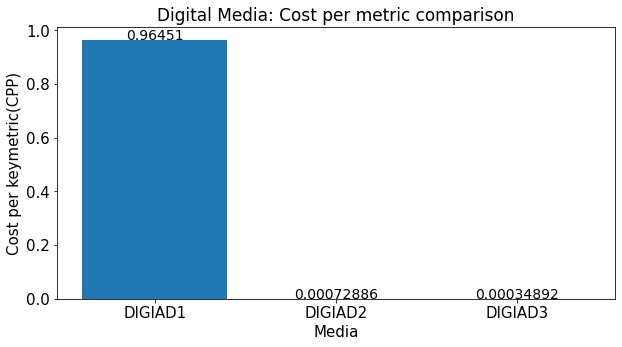

In [52]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=14)

x=['DIGIAD1','DIGIAD2','DIGIAD3']
y= [9.6451e-01,7.2886e-04,3.4892e-04]
plt.figure(figsize = (10, 5))
plt.bar(x,y)
addlabels(x, y)
      
# giving title to the plot
plt.title("Digital Media: Cost per metric comparison",size=17
          )
  
# giving X and Y labels
plt.xlabel("Media",size=15)
plt.ylabel("Cost per keymetric(CPP)",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=14)

x=['DIGIAD1','DIGIAD2','DIGIAD3']
y= [9.6451e-01,7.2886e-04,3.4892e-04]
plt.figure(figsize = (10, 5))
plt.bar(x,y)
addlabels(x, y)
      
# giving title to the plot
plt.title("Digital Media: Cost per metric comparison",size=17
          )
  
# giving X and Y labels
plt.xlabel("Media",size=15)
plt.ylabel("Cost per keymetric(CPP)",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

**Modelling**

---



In [ ]:
# dt['Brand_score'] = dt["Brand_score"]+.000003*dt['DAU']
# dt["DAU"] = dt["DAU"]*.94567 
# dt['Insta_own'] = dt['Insta_own']+ dt["DAU"]*.1

In [60]:
dt.columns

Index(['Week', 'DAU', 'BRAND_lag1', 'DIGIAD2', 'DIGIAD3', 'Tvnews', 'Tvsports',
       'DIGIAD1', 'Tvent'],
      dtype='object')

In [2]:
xf = dt[['BRAND_lag1','DIGIAD1', 'DIGIAD2', 'Tvnews',
       'Tvent']]  #'Tvsports','DIGIAD3'
yf = dt[['DAU']]



In [3]:
xf = sm.add_constant(xf)
modelf = sm.OLS(yf,xf)


In [4]:
resultsf = modelf.fit()
resultsf.params

const         311036.445055
BRAND_lag1      2639.348470
DIGIAD1            0.034648
DIGIAD2            0.000028
Tvnews             5.430935
Tvent            110.082477
dtype: float64

In [5]:
dt.corr()

,DAU,BRAND_lag1,DIGIAD2,DIGIAD3,Tvnews,Tvsports,DIGIAD1,Tvent
DAU,1.000000,0.788172,0.705223,0.337427,0.794029,0.114348,0.595806,0.203855
BRAND_lag1,0.788172,1.000000,0.711554,0.308973,0.814777,0.172955,0.613918,0.165877
DIGIAD2,0.705223,0.711554,1.000000,0.200969,0.826866,0.174118,0.459570,-0.152231
DIGIAD3,0.337427,0.308973,0.200969,1.000000,0.201548,0.172513,0.529403,-0.109706
Tvnews,0.794029,0.814777,0.826866,0.201548,1.000000,0.155772,0.611773,0.127506
Tvsports,0.114348,0.172955,0.174118,0.172513,0.155772,1.000000,-0.010891,0.001761
DIGIAD1,0.595806,0.613918,0.459570,0.529403,0.611773,-0.010891,1.000000,0.026479
Tvent,0.203855,0.165877,-0.152231,-0.109706,0.127506,0.001761,0.026479,1.000000


In [6]:
print(resultsf.summary())

                            OLS Regression Results                            
Dep. Variable:                    DAU   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     51.12
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           6.27e-26
Time:                        05:57:17   Log-Likelihood:                -1289.0
No. Observations:                 105   AIC:                             2590.
Df Residuals:                      99   BIC:                             2606.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.11e+05   4.19e+04      7.426      0.0

In [27]:
#Decomps

dec = pd.DataFrame()
for i in range(len(xf.columns)):
  dec[xf.columns[i]] = xf[xf.columns[i]] * resultsf.params.values[i]

dec.head(10)

,const,BRAND_lag1,DIGIAD1,DIGIAD2,Tvnews,Tvent
0,311036.445055,83112.163216,123.062807,0.00000,0.0000,0.0
1,311036.445055,83112.163216,528.404560,0.00000,0.0000,0.0
2,311036.445055,118928.642415,1566.921641,0.00000,0.0000,0.0
3,311036.445055,122694.238248,3223.595986,0.00000,0.0000,0.0
4,311036.445055,115164.513846,6533.434523,0.00000,0.0000,0.0
5,311036.445055,118356.083286,11660.668068,0.00000,0.0000,0.0
6,311036.445055,120754.402000,17520.617346,0.00000,0.0000,0.0
7,311036.445055,118831.197882,23621.762948,0.00000,0.0000,0.0
8,311036.445055,116328.985570,31431.308505,0.00000,0.0000,0.0
9,311036.445055,117669.199815,37142.770463,5496.81936,7277.5612,0.0


### MAPE calculation

In [28]:
##Model stats

resid = abs(yf['DAU'] - dec.sum(axis=1))

def mape (actual, pred): 
  actual, pred = np.array (actual), np.array (pred) 
  return np.mean (np.abs ((actual - pred) / actual)) * 100
print("MAPE: ",round(mape(yf['DAU'],dec.sum(axis=1)),2),'%')

MAPE:  6.64 %


In [9]:
dec.columns

Index(['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'Tvnews', 'Tvent'], dtype='object')

In [10]:
dec

,const,BRAND_lag1,DIGIAD1,DIGIAD2,Tvnews,Tvent
0,311036.445055,83112.163216,123.062807,0.000000,0.000000,0.000000
1,311036.445055,83112.163216,528.404560,0.000000,0.000000,0.000000
2,311036.445055,118928.642415,1566.921641,0.000000,0.000000,0.000000
3,311036.445055,122694.238248,3223.595986,0.000000,0.000000,0.000000
4,311036.445055,115164.513846,6533.434523,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
100,311036.445055,212907.443263,38882.694561,78025.317358,63417.967256,10258.068204
101,311036.445055,229623.316907,43667.137902,78026.327793,63424.363594,5729.974777
102,311036.445055,202350.049382,45610.728383,78025.290388,63422.060902,3803.797853
103,311036.445055,214667.008910,42558.211150,78025.026989,63418.550473,1992.578227


In [29]:
dec = pd.concat([dec,resid],axis=1)

In [30]:
dec

,const,BRAND_lag1,DIGIAD1,DIGIAD2,Tvnews,Tvent,0
0,311036.445055,83112.163216,123.062807,0.000000,0.000000,0.000000,105963.671078
1,311036.445055,83112.163216,528.404560,0.000000,0.000000,0.000000,17874.987169
2,311036.445055,118928.642415,1566.921641,0.000000,0.000000,0.000000,5917.009111
3,311036.445055,122694.238248,3223.595986,0.000000,0.000000,0.000000,37459.279288
4,311036.445055,115164.513846,6533.434523,0.000000,0.000000,0.000000,22168.393424
...,...,...,...,...,...,...,...
100,311036.445055,212907.443263,38882.694561,78025.317358,63417.967256,10258.068204,82014.064304
101,311036.445055,229623.316907,43667.137902,78026.327793,63424.363594,5729.974777,29574.566028
102,311036.445055,202350.049382,45610.728383,78025.290388,63422.060902,3803.797853,40411.628037
103,311036.445055,214667.008910,42558.211150,78025.026989,63418.550473,1992.578227,51273.179197


In [31]:
dec.columns = ['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'Tvnews', 'Tvent','Residual']

In [15]:
dec.head(2
         )

,const,BRAND_lag1,DIGIAD1,DIGIAD2,Tvnews,Tvent,Residual
0,311036.445055,83112.163216,123.062807,0.0,0.0,0.0,-105963.671078
1,311036.445055,83112.163216,528.404560,0.0,0.0,0.0,17874.987169


In [16]:
dec.iloc[:,2:6]

,DIGIAD1,DIGIAD2,Tvnews,Tvent
0,123.062807,0.000000,0.000000,0.000000
1,528.404560,0.000000,0.000000,0.000000
2,1566.921641,0.000000,0.000000,0.000000
3,3223.595986,0.000000,0.000000,0.000000
4,6533.434523,0.000000,0.000000,0.000000
...,...,...,...,...
100,38882.694561,78025.317358,63417.967256,10258.068204
101,43667.137902,78026.327793,63424.363594,5729.974777
102,45610.728383,78025.290388,63422.060902,3803.797853
103,42558.211150,78025.026989,63418.550473,1992.578227


In [17]:
np.sum(dec[['const','BRAND_lag1','Residual']].sum(axis=0))

52491708.80422925

In [32]:


## ATL + BTL 
media = sum(dec[['DIGIAD1','DIGIAD2','Tvnews','Tvent']].sum(axis=0))
base = np.sum(dec[['const','BRAND_lag1','Residual']].sum(axis=0))

##Contribution
print('Media contribution: ',media/sum(dec.sum(axis=0))*100,'%')
print('Base contribution: ',base/sum(dec.sum(axis=0))*100,'%')

Media contribution:  22.7443685100745 %
Base contribution:  77.25563148992549 %


In [ ]:
#dec2.loc[np.where(dec2['AHS']==1)[0],dec2.columns]

In [ ]:
base_vector = dec[['const','Brand_score','Covid_index']].sum(axis=1) + resid
np.median(base_vector)

1229456.4144985373

In [33]:
contri_pie = pd.DataFrame({'Base':[77.2],"Incremental":[22.74]})


([<matplotlib.patches.Wedge at 0x7f452929a6d0>,
 [Text(-0.7210354493887194, -0.8307273203192536, 'Base Contribution(77.2%)'),
  Text(0.7210353716104118, 0.8307273878274604, 'Media Contribution(22.74%)')])

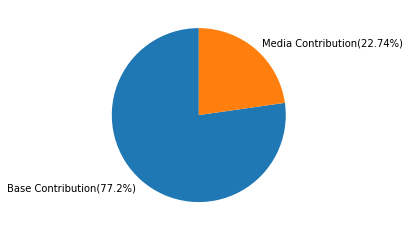

In [34]:
plt.pie(contri_pie,labels=['Base Contribution(77.2%)','Media Contribution(22.74%)'],startangle = 90)

In [ ]:
decf.head()

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform2,Own_digital_1,Own_digital_2,Insta_own,AHS,ALS,Residual
0,164148.344936,0.000000,207754.603168,142258.659758,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3532.315893,6380.032674,365.103269,-0.0,0.0,185432.634322
1,164148.344936,0.000000,204904.869706,190072.687401,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3846.111243,6380.032674,365.103269,-0.0,0.0,143469.719871
2,164148.344936,32478.925003,202176.698395,160020.668801,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4144.711159,6380.032674,365.103269,-0.0,0.0,98672.176944
3,164148.344936,32478.925003,201882.813344,146310.018363,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4517.002163,6380.032674,365.103269,-0.0,0.0,159832.343312
4,164148.344936,32478.925003,201237.243696,137740.861840,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4855.320085,6380.032674,365.103269,-0.0,0.0,182777.588786


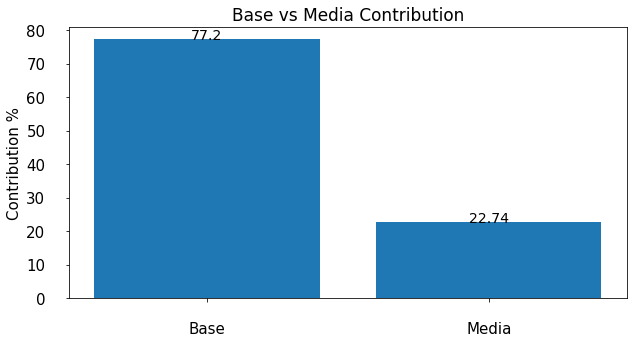

In [36]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=14)

x=['Base','Media']
y=[77.20,22.74]
plt.figure(figsize = (10, 5))
plt.bar(x,y)
addlabels(x, y)
      
# giving title to the plot
plt.title("Base vs Media Contribution",size=17
          )
  
# giving X and Y labels
#plt.xlabel("Variable Type",size=15)
plt.ylabel("Contribution %",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tick_params(axis='both', which='major', pad=20)  
# visualizing the plot
plt.show()

In [37]:
## with ALS, AHS

#print('Brand contribution: ',np.sum(dec['Brand_score'])/sum(dec.sum(axis=0))*100,'%')
print('Brand_lag1: ',np.sum(dec['BRAND_lag1'])/sum(dec.sum(axis=0))*100,'%')
print('residue',(np.sum(dec['Residual'])/sum(dec.sum(axis=0)))*100,'%')
print('CONSTANT',(np.sum(dec['const'])/sum(dec.sum(axis=0)))*100,'%')
print('DIGIAD1',(np.sum(dec['DIGIAD1'])/sum(dec.sum(axis=0)))*100,'%')
print('DIGIAD2',(np.sum(dec['DIGIAD2'])/sum(dec.sum(axis=0)))*100,'%')
print('Tvnews',(np.sum(dec['Tvnews'])/sum(dec.sum(axis=0)))*100,'%')
print('Tvent',(np.sum(dec['Tvent'])/sum(dec.sum(axis=0)))*100,'%')

Brand_lag1:  26.92919865922459 %
residue 5.9820946529721235 %
CONSTANT 44.34433817772877 %
DIGIAD1 7.434695419413831 %
DIGIAD2 7.703153413156606 %
Tvnews 6.988716618036555 %
Tvent 0.6178030594675091 %


In [56]:
#Traditional contri
(6.988716618+0.6178030)/22.74

0.33449954344766936

In [57]:
#Digital contri
(7.43+7.7)/22.74

0.6653474054529463

In [82]:
dec.columns

Index(['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'TVnews', 'TVent',
       'Residual'],
      dtype='object')

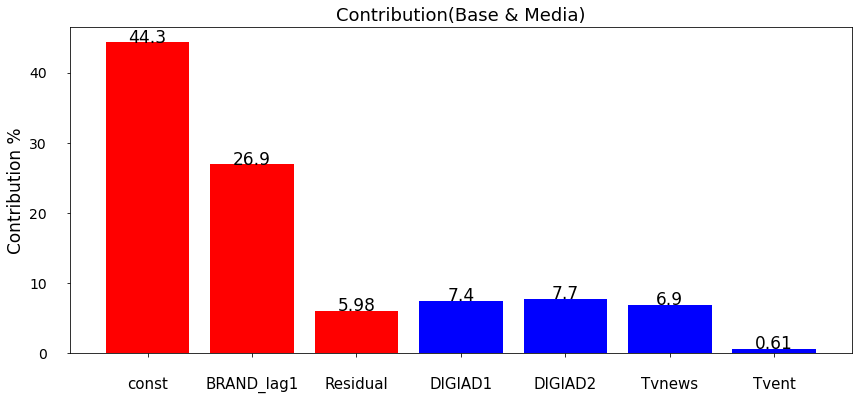

In [54]:
## Contribution 
x2=['const', 'BRAND_lag1','Residual', 'DIGIAD1', 'DIGIAD2', 'Tvnews', 'Tvent']
y2 = [44.3,26.9,5.98,7.4,7.7,6.9,0.61]
def addlabels2(x2,y2):
    for i in range(len(x2)):
      #if x2[i] in ['const', 'Covid_index', 'Brand_score','AHS','LHS']:
        plt.text(i, y2[i], y2[i], ha = 'center',size=17)
      # else:
      #   plt.text(i, y2[i], y2[i], ha = 'center',size=14,color='blue')


      
plt.figure(figsize = (14, 6))
plt.bar(x2[0:3],y2[0:3],color='red')
plt.bar(x2[3:],y2[3:],color='blue')

addlabels2(x2,y2)  
#addlabels2(x2[5:],y2[5:])  
      
# giving title to the plot
plt.title("Contribution(Base & Media)",size=18)
  
# giving X and Y labels
#plt.xlabel("Variable",size=15,labelpad=10)
plt.ylabel("Contribution %",size=17)
plt.yticks(fontsize=14)
plt.xticks(fontsize=15)
plt.tick_params(axis='both', which='major', pad=20)
  
# visualizing the plot
plt.show()

Text(0.5, 1.0, 'Traditional vs Digital media contribution in Media contribution')

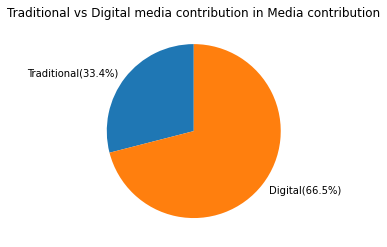

In [60]:
##ATL vs BTL contri

plt.pie([29,71],labels=['Traditional(33.4%)','Digital(66.5%)'],startangle = 90)
plt.title('Traditional vs Digital media contribution in Media contribution')

In [64]:
dm.columns

Index(['Year', 'DIGIAD1', 'DIGIAD2', 'DIGIAD3', 'TVnews', 'TVsports', 'TVent'], dtype='object')

In [66]:
model_vars =['DIGIAD1', 'DIGIAD2', 'TVnews', 'TVent']

In [67]:
xf.columns = ['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'TVnews', 'TVent']

In [65]:
xf.columns

Index(['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'Tvnews', 'Tvent'], dtype='object')

# RoI

In [68]:
spends_list = np.sum(dm[model_vars],axis=0)

In [69]:
spends_list

DIGIAD1    1.524330e+07
DIGIAD2    1.352487e+07
TVnews     2.619822e+07
TVent      4.563442e+06
dtype: float64

In [74]:
dec.columns = ['const', 'BRAND_lag1', 'DIGIAD1', 'DIGIAD2', 'TVnews', 'TVent',
       'Residual']

In [75]:
spends_list = np.sum(dm[model_vars],axis=0)
decomps = []

for i in range(len(xf.columns)):
  contribution = np.sum(dec[xf.columns[i]])/sum(dec.sum(axis=0))*100
  print(xf.columns[i],' contribution: ',contribution,'%')
  if xf.columns[i] in model_vars:
    decomps.append(np.sum(dec[xf.columns[i]]))

const  contribution:  44.34433817772877 %
BRAND_lag1  contribution:  26.92919865922459 %
DIGIAD1  contribution:  7.434695419413831 %
DIGIAD2  contribution:  7.703153413156606 %
TVnews  contribution:  6.988716618036555 %
TVent  contribution:  0.6178030594675091 %


In [76]:
#manip
roi = pd.DataFrame({'Decomps':decomps,'Spends':spends_list})
#roi['Spends'] = spends_list
roi['RoI'] = roi['Decomps']/roi['Spends']

In [77]:
roi

,Decomps,Spends,RoI
DIGIAD1,5.475523e+06,1.524330e+07,0.359208
DIGIAD2,5.673237e+06,1.352487e+07,0.419467
TVnews,5.147067e+06,2.619822e+07,0.196466
TVent,4.550011e+05,4.563442e+06,0.099706


In [78]:

roi = roi.round(3)

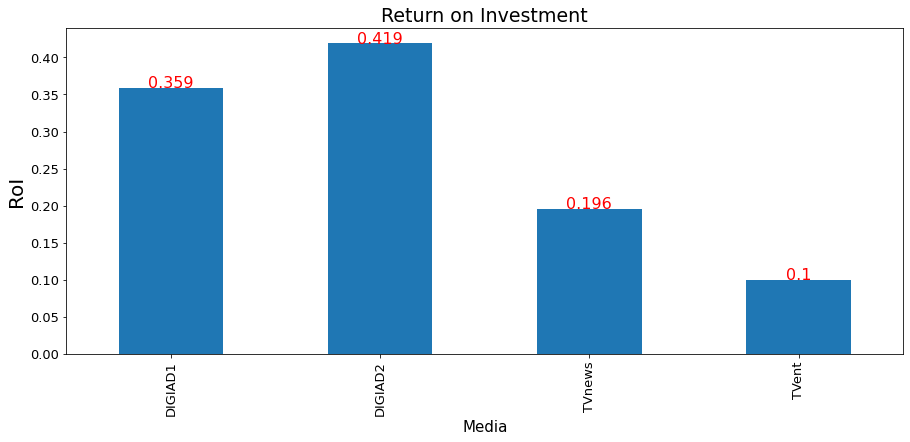

In [81]:
#roi[['RoI']].plot(kind='bar')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=16,color='red')
abc = [i for i in roi.index]      
plt.figure(figsize = (15, 6))
# plt.bar(x2[0:5],y2[0:5],color='red')
# plt.bar(x2[5:],y2[5:],color='blue')

addlabels(abc,roi['RoI'])  
#addlabels2(x2[5:],y2[5:])  
      
# giving title to the plot
roi['RoI'].plot(kind='bar')
plt.title("Return on Investment",size=19)
  
# giving X and Y labels
plt.xlabel("Media",size=15)
plt.ylabel("RoI",size=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
  
# visualizing the plot
plt.show()

**RESPONSE CURVE**

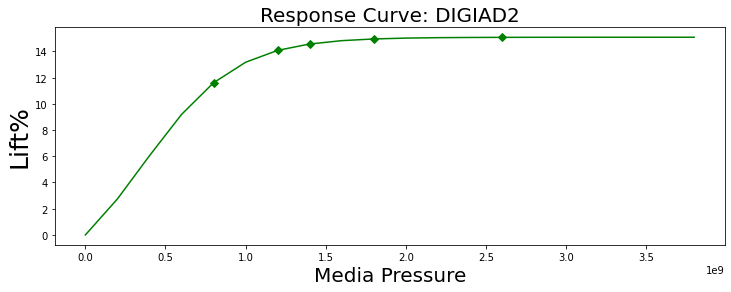

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
rc1 = pd.read_excel('Testing_data.xlsx',sheet_name='RC_Digi2')
rc1 = rc1.iloc[:20,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])
rc1['Lift'] = rc1['Lift']*100
markers_on = [4,6,7,9,13]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: DIGIAD2",size=20)
  
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

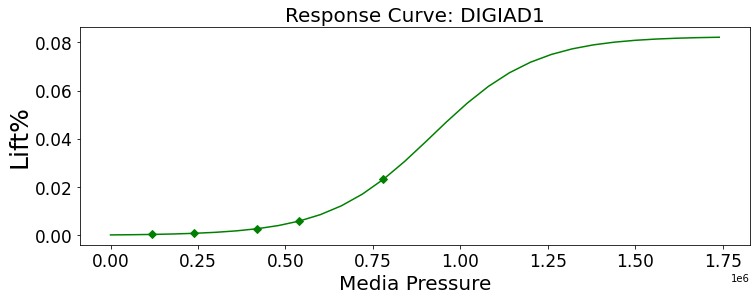

In [12]:
rc1 = pd.read_excel('Testing_data.xlsx',sheet_name='RC_Digi1')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [15, 21, 25, 31,46]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
      
# giving title to the plot
plt.title("Response Curve: DIGIAD1",size=20)
  
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

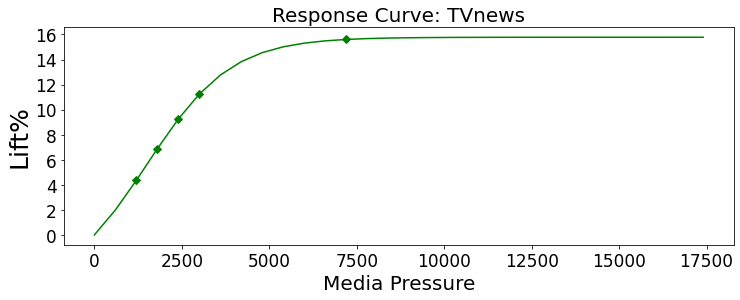

In [22]:
rc1 = pd.read_excel('Testing_data.xlsx',sheet_name='RC_TVnews')
rc1 = rc1.iloc[:30,:]
rc1['Lift'] = rc1['Lift']*100
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [2,3, 4, 5, 12]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: TVnews",size=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

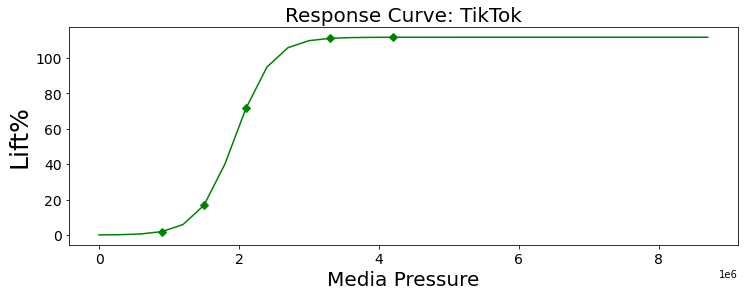

In [ ]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_TikTok')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 5, 7, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: TikTok",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

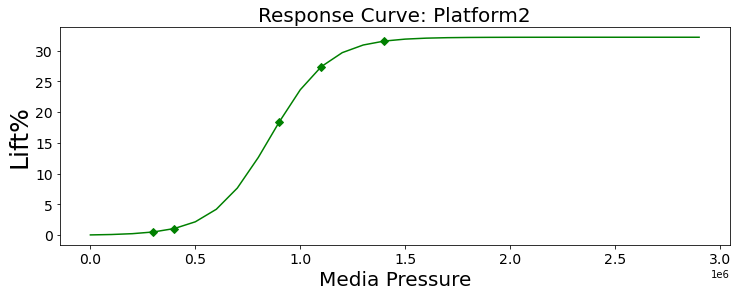

In [ ]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_Platform2')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3,4, 9, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Platform2",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

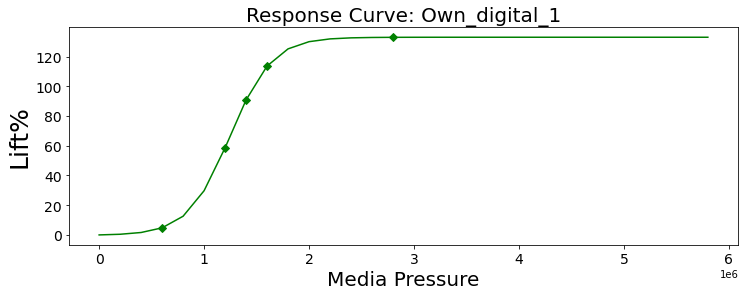

In [ ]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_OD_1')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 6, 7, 8,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Own_digital_1",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

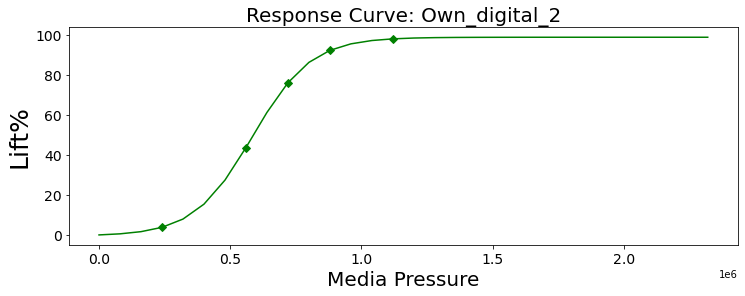

In [ ]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_OD_2')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (12, 4))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 7, 9, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Own_digital_2",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

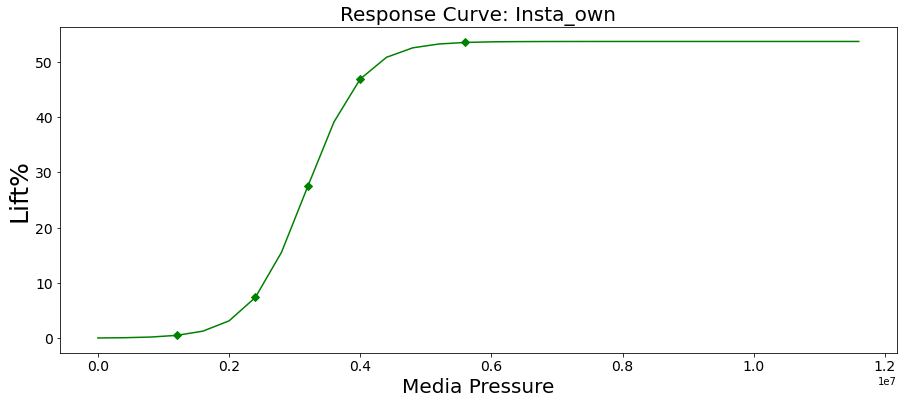

In [ ]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_Insta_own')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 6, 8, 10,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Insta_own",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

In [ ]:
dec.head()

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,TV_ent,Own_digital_1,Own_digital_2,Insta_own
0,83067.261403,0.000000,214686.872041,155137.221177,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3167.433910,5048.489205,307.931093
1,83067.261403,0.000000,211742.049862,207279.814074,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3448.814756,5048.489205,307.931093
2,83067.261403,44172.671075,208922.846070,174507.210534,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3716.569828,5048.489205,307.931093
3,83067.261403,44172.671075,208619.154785,159555.346000,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4050.403831,5048.489205,307.931093
4,83067.261403,44172.671075,207952.044038,150210.430667,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4353.774110,5048.489205,307.931093


In [ ]:
roi.index

Index(['Vouchers_P1', 'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT',
       'TikTok', 'TV_ent', 'Own_digital_1', 'Own_digital_2', 'Insta_own'],
      dtype='object')

In [ ]:
roi.loc['Vouchers_P1','Decomps']

269498638.22947526

In [ ]:
for i in dec.columns[3:]:
  rcx = xf[i]
  rcy = dec[i]

  #rcx = sm.add_constant(xf)
  modelrc = sm.OLS(rcy,rcx)
  results_rc = modelrc.fit()
  print(results_rc.params)

  


Vouchers_P1    1.937774
dtype: float64
Vouchers_P2    0.42426
dtype: float64
Meta_video    0.500277
dtype: float64
Meta_nonvideo    0.370548
dtype: float64
YT    1.417107
dtype: float64
TikTok    0.368045
dtype: float64
TV_ent    0.406076
dtype: float64
Own_digital_1    0.589046
dtype: float64
Own_digital_2    1.157778
dtype: float64
Insta_own    0.10509
dtype: float64


# New Section

In [ ]:
df['BRAND']

0     -39.721121
1     -39.717831
2     -39.762291
3     -39.715124
4     -39.701162
         ...    
695    12.527115
696    12.422954
697    12.290323
698    12.323842
699    12.297524
Name: BRAND, Length: 700, dtype: float64

In [ ]:
xm = dfm.drop(["Week",'dv',"GRI_extfactor","OM_E1_platformsb1_imp","OM_E1_platformsb2_imp","TV_grp","TVSPN_grp","PERMKT_E2_type6_net"],axis=1)

ym = dfm[['dv']]

xm.shape,ym.shape

Xm_with_constant = sm.add_constant(xm)
modelm = sm.OLS(ym,xm)



In [ ]:
resultsm = modelm.fit()
resultsm.params

BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

In [ ]:
print(resultsm.summary())


                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:39:18   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

((105, 7), (105, 1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:35:45   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Spends

---



---



NameError: ignored